### Import Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
adv_data_df = pd.read_csv('/Users/ahmetokur/Desktop/Datasets/Advertising_Budget_and Sales.csv', index_col=0)

#### 2.Analyze the data

In [23]:
#Check the total number of elements in the dataset
adv_data_df.shape

(200, 4)

In [24]:
#View the initial few records of the dataset
adv_data_df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [25]:
#Check the total number of elements in the dataset
adv_data_df.size

800

#### 3.Find the features or media chanels used by the firm

In [26]:
#Check the number of observations (rows) and attributes (columns) in the dataset
adv_data_df.shape

(200, 4)

In [27]:
#View the names of each of the attributes
adv_data_df.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

In [28]:
# Handling Missing Values
adv_data_df.isnull().sum()

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

#### Asumptions of Lineer Regression model
* Probabilty Distrubution of target column (Sales) must be Normal, Sales must be normally distrubuted

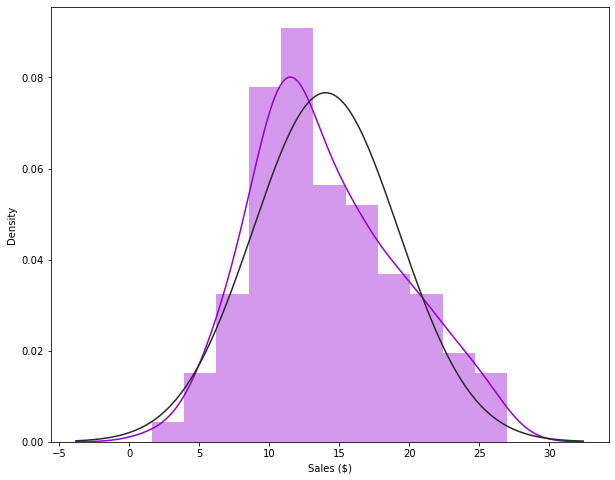

In [29]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm
plt.figure(figsize = (10,8))
sns.distplot(adv_data_df['Sales ($)'], fit = norm, color = 'darkviolet')
plt.show()

#### Q-Q Plot(Quantle-Quantile plots)

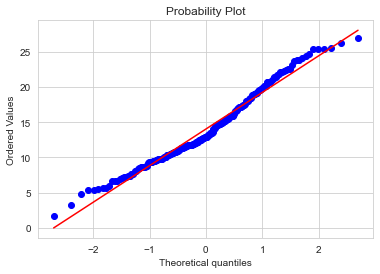

In [30]:
# Best way to check if data is normally distrubuted
from scipy import stats
sns.set_style('whitegrid')
fig = plt.figure()
res = stats.probplot(adv_data_df['Sales ($)'], plot = plt)

#### Hypotesis Testing - Correlation

<AxesSubplot:>

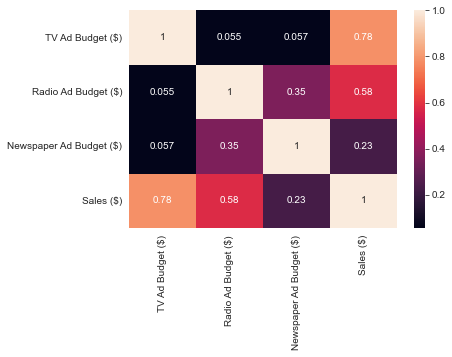

In [31]:
sns.heatmap(adv_data_df.corr(), annot = True)

#### 4.Create objects to train the model; find the sales for each channel

In [32]:
# Create a feature object from the columns
X_feature = adv_data_df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]

In [33]:
#View the feature object
X_feature.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [34]:
#Create a target object (Hint: use the sales column as it is the response of the dataset)
Y_target = adv_data_df[['Sales ($)']]

In [35]:
#view the target object
Y_target.head()

,Sales ($)
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [36]:
#Verify if all the observations have been captured in the feature object
X_feature.shape


(200, 3)

In [37]:
#Verify if all the observations have been captured in the target object
Y_target.shape

(200, 1)

#### 5. Split the data into training and testing datasets or the model

In [38]:
# Split the dataset (by default, 75% is the training data and 25% is the testing data)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_feature,Y_target,test_size = 0.25, random_state=1)

In [39]:
#Verify if the training and testing datasets are split correctly (Hint: use the shape() method)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150, 1)
(50, 1)


#### 6. Create a model to predict the sales outcome

In [41]:
# Create a linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# Training of the model, fit means train
lin_reg.fit(x_train,y_train)

LinearRegression()

In [42]:
#Print the intercept and coefficients 
print(lin_reg.intercept_)
# beta1, beta2, beta3
print(lin_reg.coef_)

[2.87696662]
[[0.04656457 0.17915812 0.00345046]]


In [43]:
# Predict the outcome from the testing dataset
y_pred = lin_reg.predict(x_test)
y_pred

array([[21.70910292],
       [16.41055243],
       [ 7.60955058],
       [17.80769552],
       [18.6146359 ],
       [23.83573998],
       [16.32488681],
       [13.43225536],
       [ 9.17173403],
       [17.333853  ],
       [14.44479482],
       [ 9.83511973],
       [17.18797614],
       [16.73086831],
       [15.05529391],
       [15.61434433],
       [12.42541574],
       [17.17716376],
       [11.08827566],
       [18.00537501],
       [ 9.28438889],
       [12.98458458],
       [ 8.79950614],
       [10.42382499],
       [11.3846456 ],
       [14.98082512],
       [ 9.78853268],
       [19.39643187],
       [18.18099936],
       [17.12807566],
       [21.54670213],
       [14.69809481],
       [16.24641438],
       [12.32114579],
       [19.92422501],
       [15.32498602],
       [13.88726522],
       [10.03162255],
       [20.93105915],
       [ 7.44936831],
       [ 3.64695761],
       [ 7.22020178],
       [ 5.9962782 ],
       [18.43381853],
       [ 8.39408045],
       [14

#### 7. Calculate the Mean Square Error(MSE)

In [44]:
#Import required libraries for calculating MSE (mean square error)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.9730456202283377

In [45]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

1.4046514230328953

In [46]:
# R2-Score (0-1) closer to 1 means less variability
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9156213613792232